In [ ]:
# base_dir = './input'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# train_normal_dir = os.path.join(train_dir, 'NORMAL')
# train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


# validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
# validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [ ]:
# labels = ['NORMAL', 'PNEUMONIA']
# img_size = 224


# def get_data(data_dir):
#     data = [] 

#     for label in labels: 
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)

#         for img in os.listdir(path):
#             try:
#                 img_arr = cv.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
#                 resized_arr = cv.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#                 data.append((resized_arr, class_num))

#             except Exception as e:
#                 print(e)

#     #return np.array(data)
#     return data

In [ ]:
# # Fetcing train and validation data.
# train = get_data('./input/train')
# val = get_data('./input/val')

In [ ]:
# x_train = []
# y_train = []
# x_val = []
# y_val = []

# for feature, label in train:
#   x_train.append(feature)
#   y_train.append(label)

# for feature, label in val:
#   x_val.append(feature)
#   y_val.append(label)

# # Normalize the data
# x_train = np.array(x_train) / 255 
# x_val = np.array(x_val) / 255

# x_train.reshape(-1, img_size, img_size, 1)
# y_train = np.array(y_train)

# x_val.reshape(-1, img_size, img_size, 1)
# y_val = np.array(y_val)

In [ ]:
# x_train.shape

(5216, 224, 224, 3)

In [ ]:
# y_train.shape

(5216,)

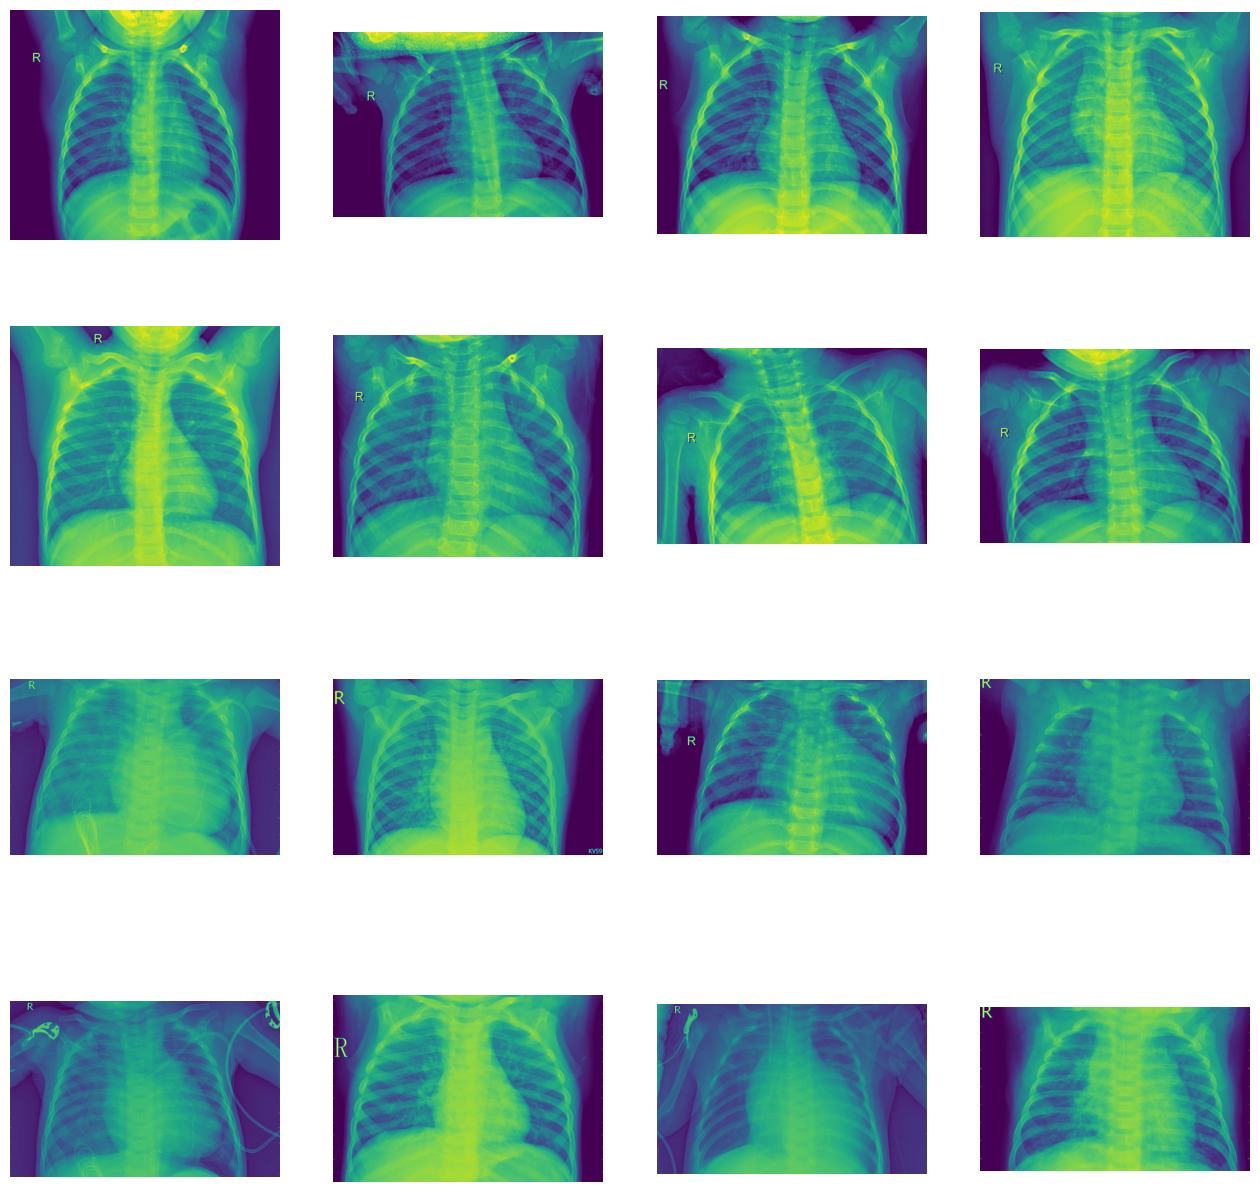

In [ ]:
# nrows = 4
# ncols = 4

# fig = plt.gcf()
# fig.set_size_inches(ncols*4, nrows*4)
# pic_index = 100
# train_normal_fnames = os.listdir( train_normal_dir )
# train_pneumonia_fnames = os.listdir( train_pneumonia_dir )


# next_normal_pix = [os.path.join(train_normal_dir, fname) 
#                 for fname in train_normal_fnames[ pic_index-8:pic_index] 
#                ]

# next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
#                 for fname in train_pneumonia_fnames[ pic_index-8:pic_index]
#                ]

# for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

## VGG16

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

In [ ]:
base_model = VGG16(
    input_shape = (224, 224, 3), # Shape of our images
    include_top = False, # Leave out the last fully connected layer
    weights = 'imagenet'
)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 50, epochs = 10)

Epoch 1/10
50/50 [==============================] - 258s 5s/step - loss: 392.9200 - acc: 0.6860 - val_loss: 3.1500 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 251s 5s/step - loss: 0.6889 - acc: 0.7210 - val_loss: 0.7194 - val_acc: 0.5000
Epoch 3/10
50/50 [==============================] - 253s 5s/step - loss: 0.5913 - acc: 0.7410 - val_loss: 0.7800 - val_acc: 0.5000
Epoch 4/10
50/50 [==============================] - 255s 5s/step - loss: 0.5870 - acc: 0.7280 - val_loss: 0.7983 - val_acc: 0.5000
Epoch 5/10
50/50 [==============================] - 250s 5s/step - loss: 0.5904 - acc: 0.7240 - val_loss: 0.8062 - val_acc: 0.5000
Epoch 6/10
50/50 [==============================] - 251s 5s/step - loss: 0.5604 - acc: 0.7520 - val_loss: 0.8420 - val_acc: 0.5000
Epoch 7/10
50/50 [==============================] - 251s 5s/step - loss: 0.5897 - acc: 0.7270 - val_loss: 0.8279 - val_acc: 0.5000
Epoch 8/10
50/50 [==============================] - 250s 5s/step - loss: 0.5741 -

## InceptionV3

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 8s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10


C:\Users\laerk\AppData\Local\Temp\ipykernel_19348\1267868463.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 50, epochs = 10)


50/50 [==============================] - 19s 336ms/step - loss: 17.4634 - acc: 0.7500 - val_loss: 1.9265 - val_acc: 0.6875
Epoch 2/10
50/50 [==============================] - 16s 318ms/step - loss: 2.8081 - acc: 0.8100 - val_loss: 3.7424 - val_acc: 0.6875
Epoch 3/10
50/50 [==============================] - 17s 334ms/step - loss: 0.9458 - acc: 0.8570 - val_loss: 1.6121 - val_acc: 0.6875
Epoch 4/10
50/50 [==============================] - 16s 323ms/step - loss: 0.5314 - acc: 0.8350 - val_loss: 0.4938 - val_acc: 0.6875
Epoch 5/10
50/50 [==============================] - 17s 335ms/step - loss: 0.5073 - acc: 0.8510 - val_loss: 0.4859 - val_acc: 0.7500
Epoch 6/10
50/50 [==============================] - 17s 329ms/step - loss: 0.4415 - acc: 0.8840 - val_loss: 0.4839 - val_acc: 0.7500
Epoch 7/10
50/50 [==============================] - 16s 307ms/step - loss: 0.3039 - acc: 0.8900 - val_loss: 1.0896 - val_acc: 0.6250
Epoch 8/10
50/50 [==============================] - 16s 318ms/step - loss: 0.39

## ResNet50

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94765736/94765736 [==============================] - 9s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ 

In [ ]:
base_model.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['acc'])

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.rmsprop.RMSprop object at 0x0000020385170D90>

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 50, epochs = 10)

## Our model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(150, 150, 3), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150


ValueError: in user code:


    ValueError: `logits` and `labels` must have the same shape, received ((None, 150, 150, 1) vs (None, 1)).
